# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Create input data and deep learning laye

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3),
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1'))

model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

170500096/170498071 [==============================] - 34s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
______________________________________________________

# Trainning

Epoch 1/20
391/391 [==============================] - 171s 437ms/step - loss: 1.6124 - accuracy: 0.4105 - val_loss: 1.2345 - val_accuracy: 0.5596
Epoch 2/20
391/391 [==============================] - 172s 439ms/step - loss: 1.1680 - accuracy: 0.5846 - val_loss: 0.9923 - val_accuracy: 0.6505
Epoch 3/20
391/391 [==============================] - 172s 441ms/step - loss: 0.9912 - accuracy: 0.6478 - val_loss: 0.8904 - val_accuracy: 0.6903
Epoch 4/20
391/391 [==============================] - 171s 437ms/step - loss: 0.8840 - accuracy: 0.6885 - val_loss: 0.8370 - val_accuracy: 0.7104
Epoch 5/20
391/391 [==============================] - 173s 441ms/step - loss: 0.8040 - accuracy: 0.7168 - val_loss: 0.7551 - val_accuracy: 0.7348
Epoch 6/20
391/391 [==============================] - 173s 441ms/step - loss: 0.7343 - accuracy: 0.7418 - val_loss: 0.7491 - val_accuracy: 0.7360
Epoch 7/20
391/391 [==============================] - 171s 437ms/step - loss: 0.6716 - accuracy: 0.7625 - val_loss: 0.7327 -

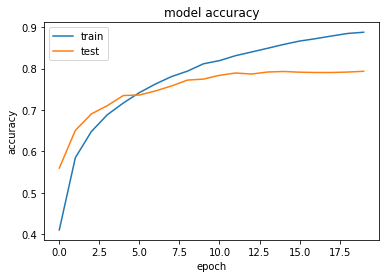

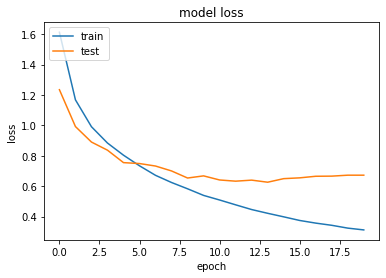

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=128, epochs=20)

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [4]:
#model.save('models\\cnn_cifar10.h5')
model.save('models/cnn_cifar10.h5')

print(model.input)
print(model.output)

Tensor("conv_filter1-1_input:0", shape=(None, 32, 32, 3), dtype=float32)
Tensor("softmax/Softmax:0", shape=(None, 10), dtype=float32)


# Predict

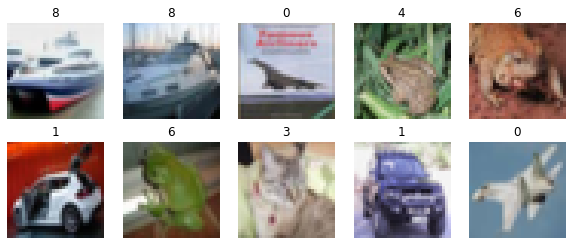

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#model = models.load_model('models\\cnn_cifar10.h5')
model = models.load_model('models/cnn_cifar10.h5')

plt.figure(figsize=(10, 4))
num = 0

while num < 2 * 5:
    num += 1
    plt.subplot(2, 5, num)
    plt.imshow(x_test[num])
    plt.axis('off')
    
    x = x_test[num]
    x = x.reshape(1, 32, 32,3)
    plt.title(np.argmax(model.predict(x)))
    